**Assignment 8]** Data Visualization I
1. use the inbuilt dataset 'titanic'.the dataset contain 891 rows and contains information about passangers who boarded the unfortunate titanic ship. use the seaborn library to see if we can find any pattern in the data.
2. write a code to check how the price of the ticket(fare)for each passanger is distributed by plotting histogram.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic.csv')
df[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [8]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [9]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

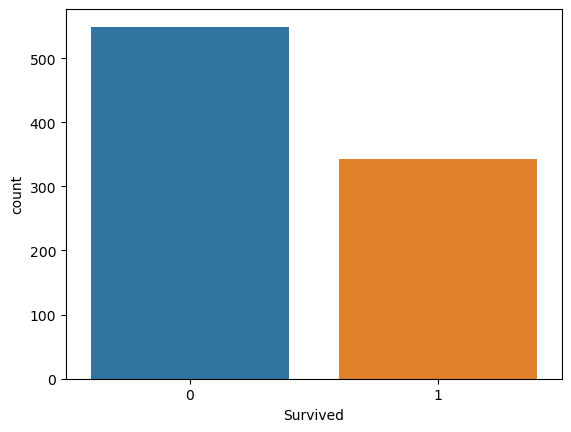

In [11]:
# The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.
# It uses the concept of a bar chart for the visual depiction.
sns.countplot(df['Survived'])                

<AxesSubplot:xlabel='Pclass', ylabel='count'>

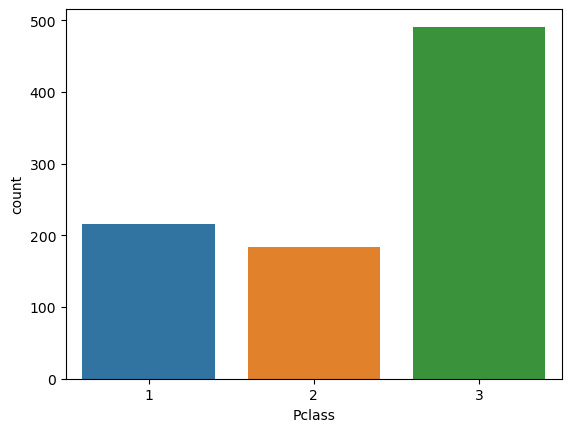

In [12]:
sns.countplot(df['Pclass'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

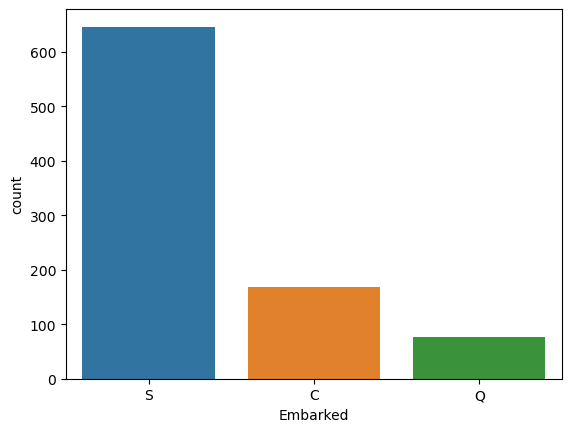

In [13]:
sns.countplot(df['Embarked'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

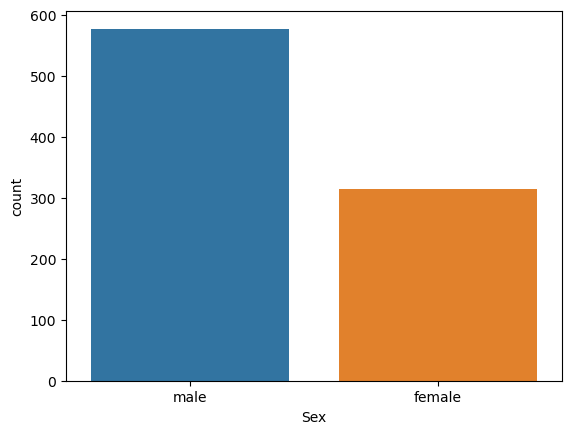

In [14]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Age'>

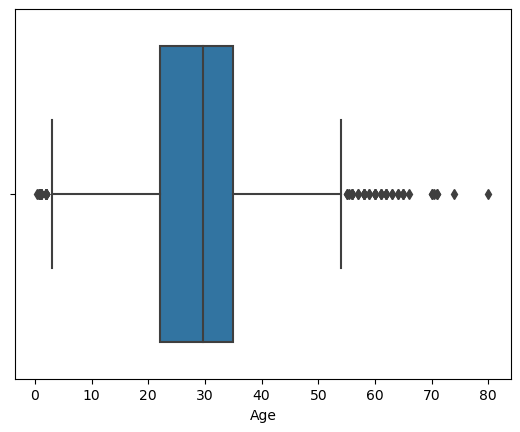

In [15]:
# Box plots are used to show distributions of numeric data values,(it checks the distribustion of data)
# especially when you want to compare them between multiple groups. 
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Fare'>

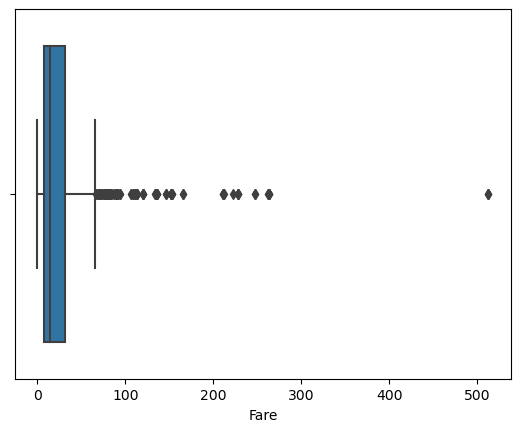

In [16]:
sns.boxplot(df['Fare'])

<AxesSubplot:xlabel='Pclass'>

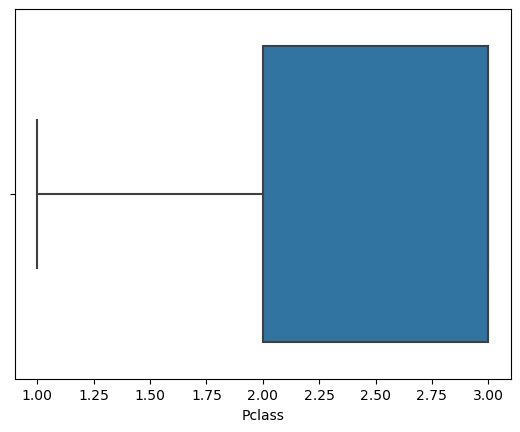

In [17]:
sns.boxplot(df['Pclass'])

<AxesSubplot:xlabel='SibSp'>

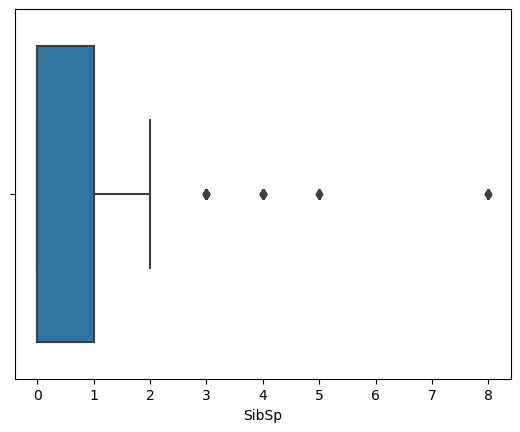

In [18]:
sns.boxplot(df['SibSp'])

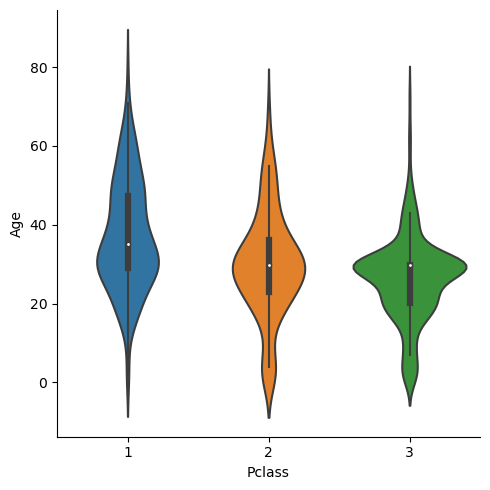

In [19]:
#Seaborn catplot method is used to work on the categorical data.
sns.catplot(x= 'Pclass', y = 'Age', data=df, kind = 'violin')

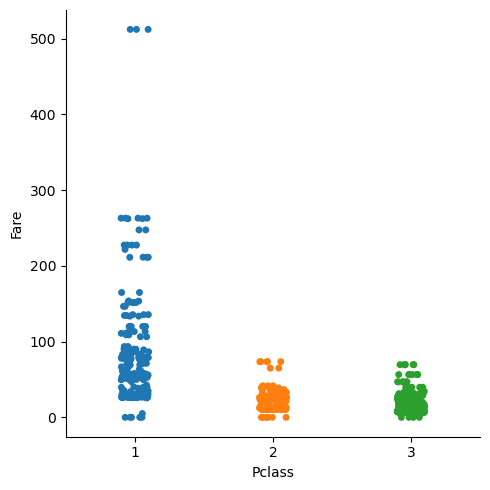

In [20]:
sns.catplot(x= 'Pclass', y = 'Fare', data=df, kind = 'strip')

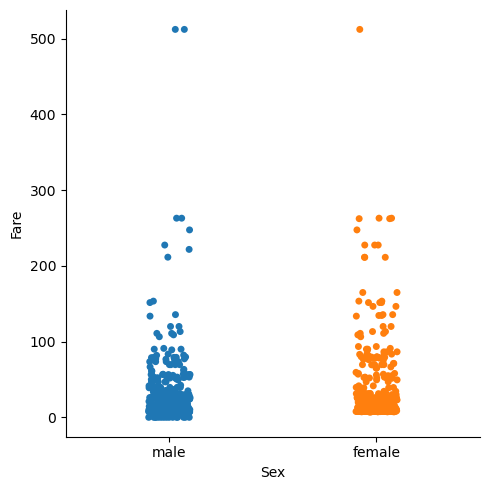

In [21]:
sns.catplot(x= 'Sex', y = 'Fare', data=df, kind = 'strip')

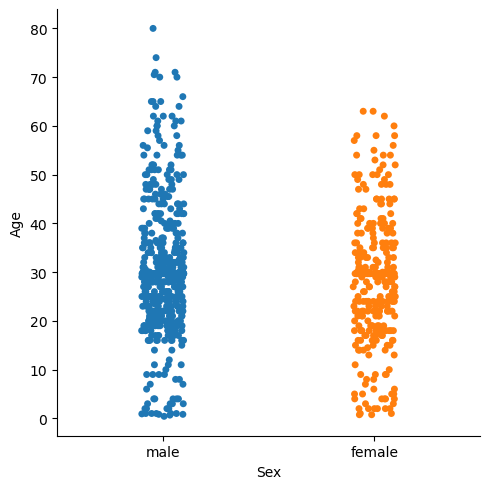

In [22]:
sns.catplot(x= 'Sex', y = 'Age', data=df, kind = 'strip')

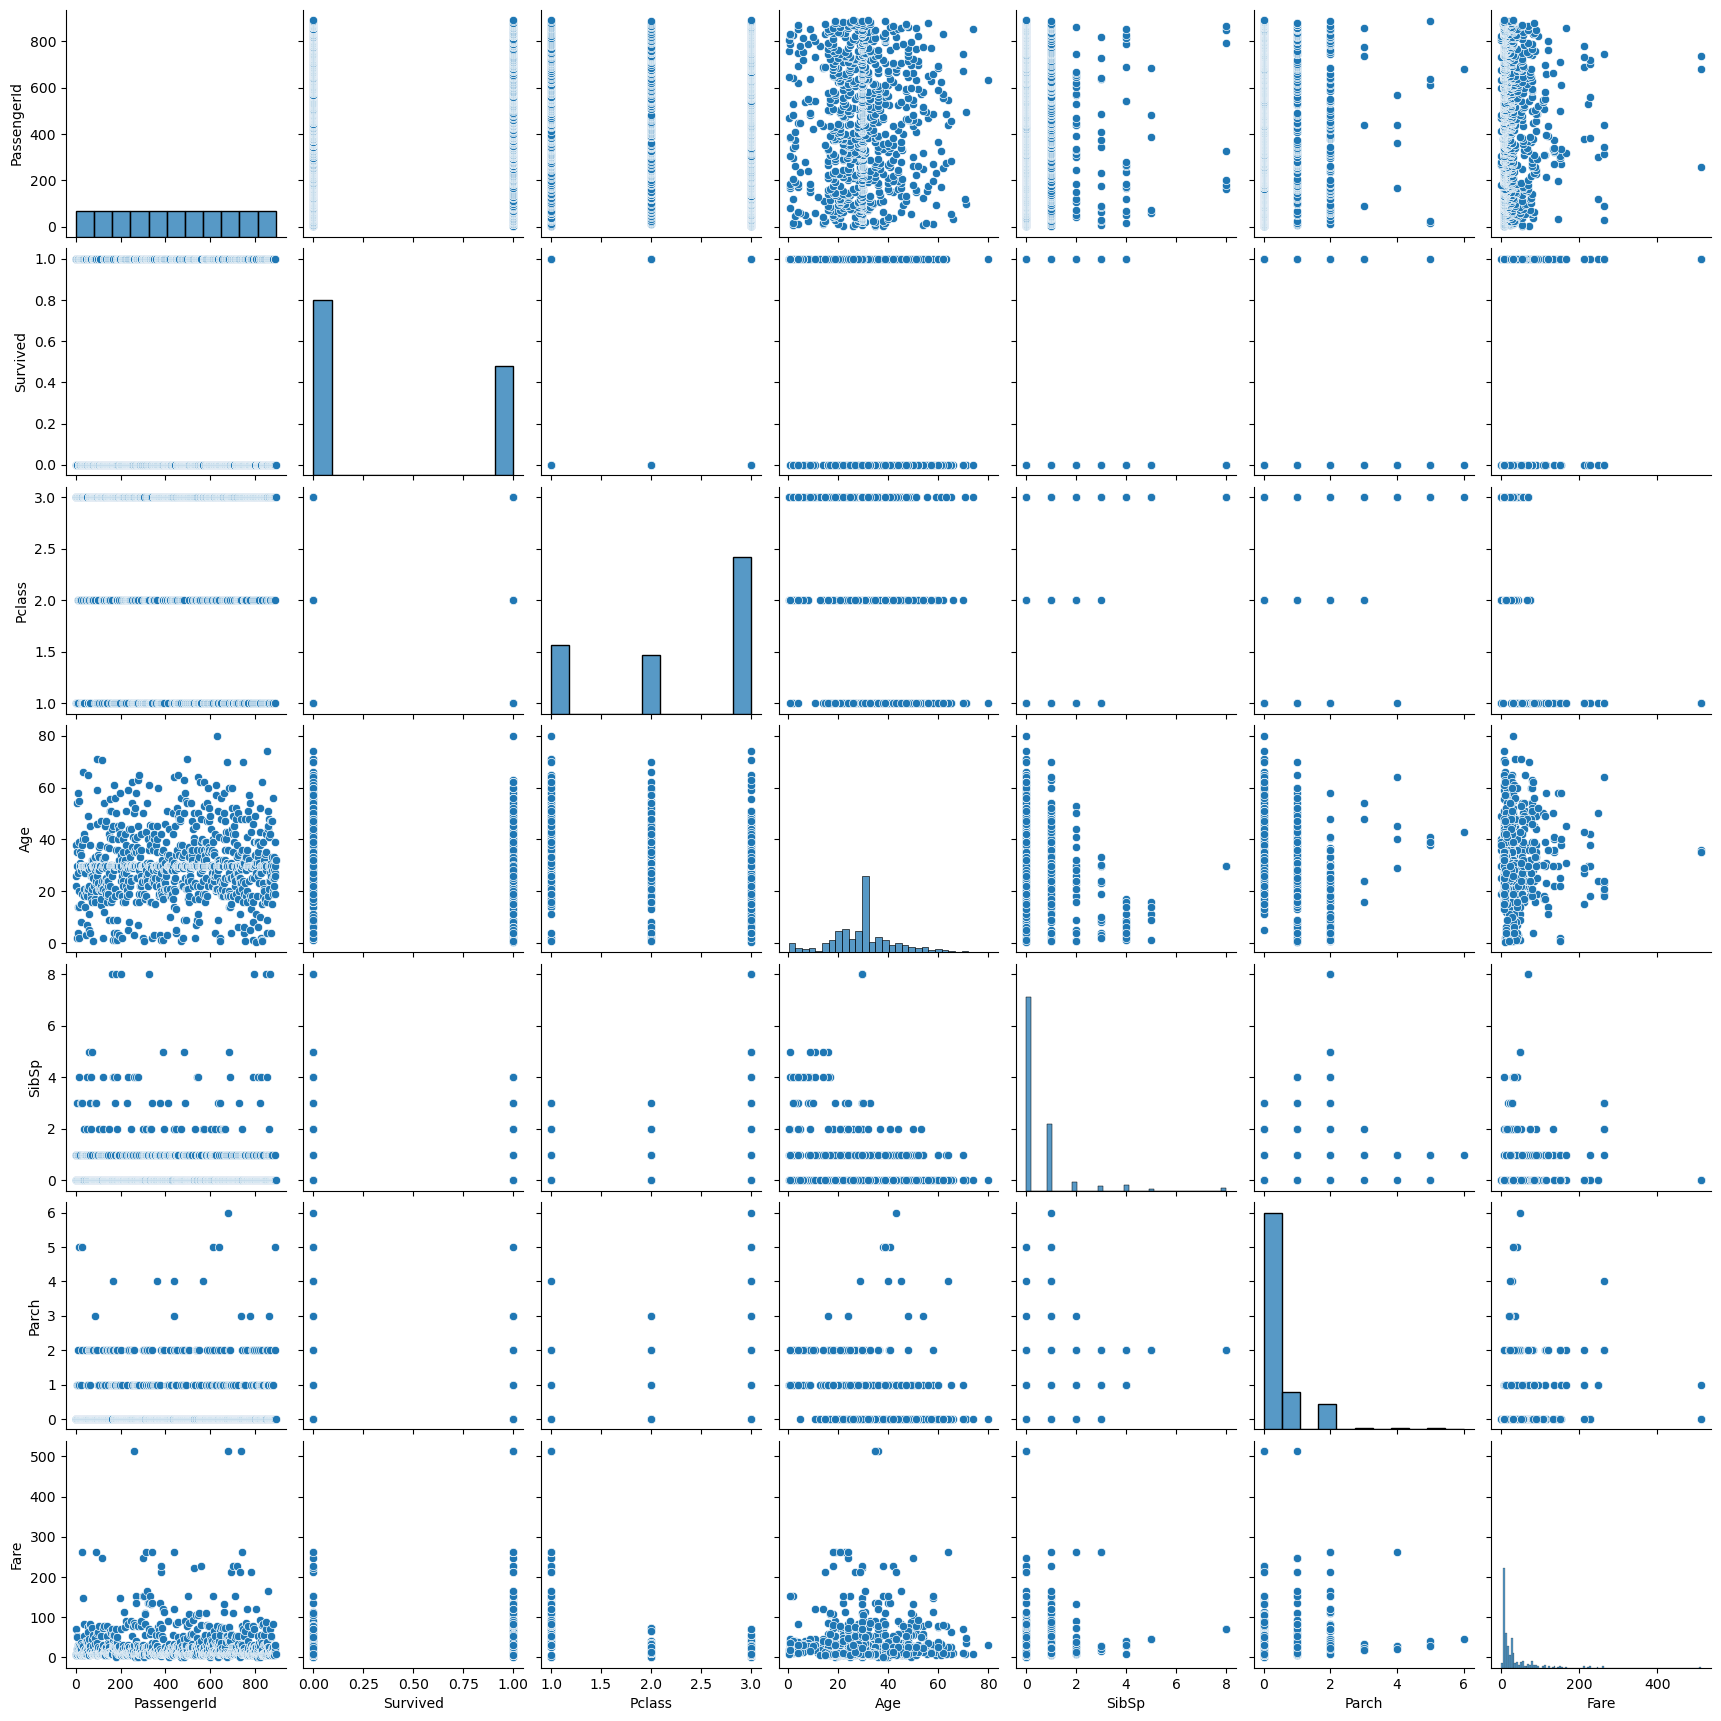

In [23]:
#Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. 
#It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.
sns.pairplot(df)

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

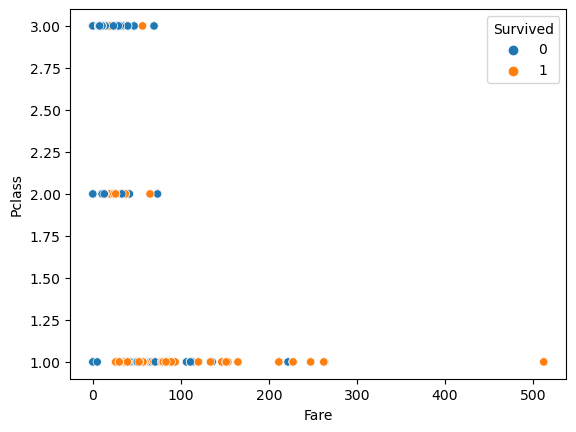

In [24]:
# The scatter plot explains the correlation between two attributes or variables. 
# It represents how closely the two variables are connected.
sns.scatterplot(x = 'Fare', y = 'Pclass', hue = 'Survived', data = df)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

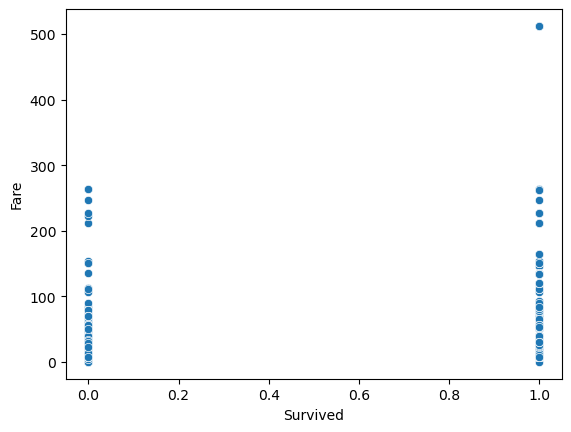

In [25]:
sns.scatterplot(x = 'Survived', y = 'Fare', data = df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

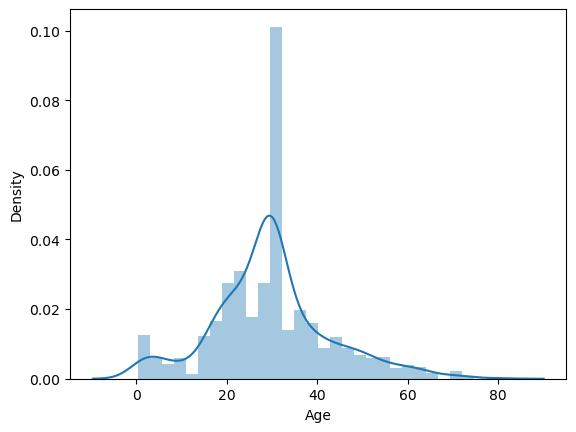

In [26]:
# A Distplot or distribution plot, depicts the variation in the data distribution.
# Seaborn Distplot represents the overall distribution of continuous data variables.
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

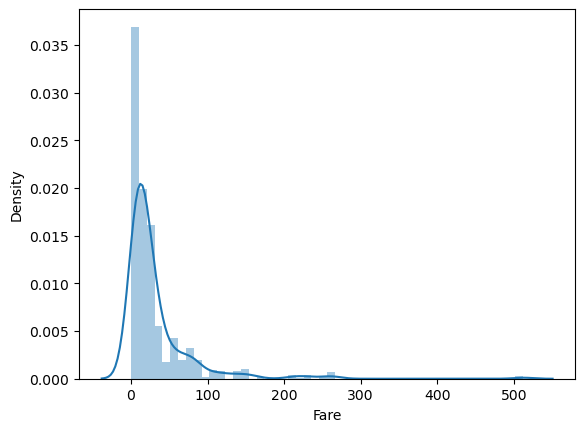

In [27]:
sns.distplot(df['Fare'])

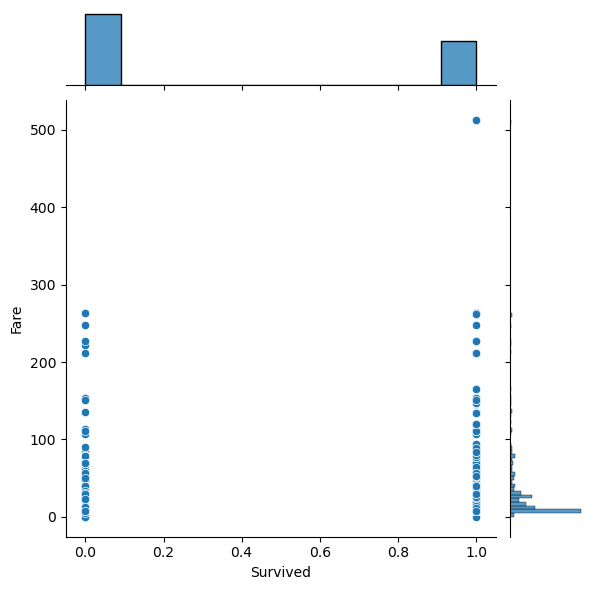

In [28]:
# The joint plot is a way of understanding the relationship between two variables and the distribution of individuals of each variable.
sns.jointplot(x = "Survived", y = "Fare", kind = "scatter", data = df)

Text(0.5, 1.0, 'Correlation')

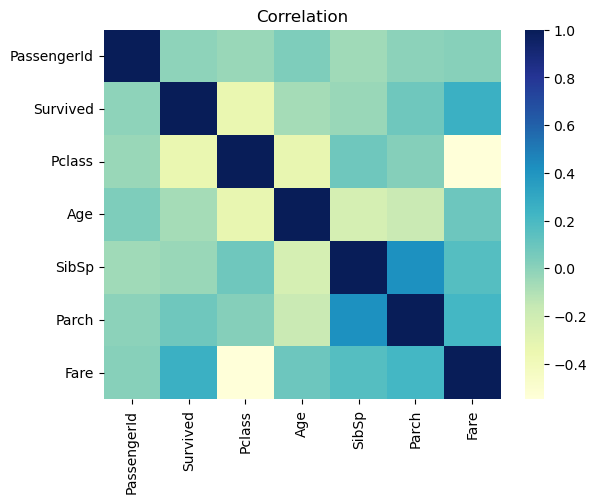

In [29]:
tc = df.corr()
sns.heatmap(tc, cmap="YlGnBu")
plt.title('Correlation')

**Price of Ticket for each passenger is distributed**

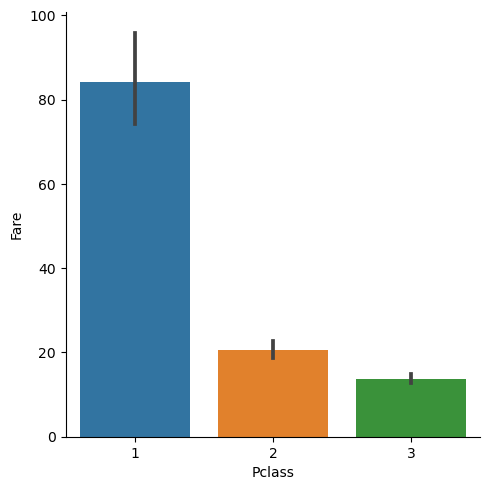

In [30]:
sns.catplot(x='Pclass', y='Fare', data=df, kind='bar')